In [1]:
!pip install --upgrade pip
!pip install ipywidgets
!pip install ipython

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [3]:
df = pd.read_csv("cirrhosis.csv")

In [4]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [5]:
df = df.dropna(subset='Drug')
df = df.drop('ID', axis=1)
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [6]:
nan_drug = df[pd.isnull(df.Drug)]

In [7]:
pd.DataFrame(nan_drug.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/nan_drug.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
N_Days,0.0,NaN
Status,0.0,NaN
Drug,0.0,NaN
Age,0.0,NaN
Sex,0.0,NaN
Ascites,0.0,NaN
Hepatomegaly,0.0,NaN
Spiders,0.0,NaN
Edema,0.0,NaN
Bilirubin,0.0,NaN


In [8]:
#  поменять потом на более красивое решение с DRY
df['Cholesterol'] = df['Cholesterol'].fillna(
    df['Status'].apply(lambda x: 415.754386 if x == 'D' else (326.539474 if x == 'C' else 439.500000))
)
df['Copper'] = df['Copper'].fillna(
    df['Status'].apply(lambda x: 135.411290 if x == 'D' else (66.610778 if x == 'C' else 124.000000))
)
df['Tryglicerides'] = df['Tryglicerides'].fillna(
    df['Status'].apply(lambda x: 140.486726 if x == 'D' else (111.788079 if x == 'C' else 133.944444))
)
df['Platelets'] = df['Platelets'].fillna(
    df['Status'].apply(lambda x: 242.137097 if x == 'D' else (272.563636 if x == 'C' else 298.842105))
)

In [9]:
df.Cholesterol = df.Cholesterol.round(0).astype('int64')
df.Copper = df.Copper.round(0).astype('int64')
df.Alk_Phos = df.Alk_Phos.round(0).astype('int64')
df.SGOT = df.SGOT.round(0).astype('int64')
df.Tryglicerides = df.Tryglicerides.round(0).astype('int64')
df.Platelets = df.Platelets.round(0).astype('int64')
df.Stage = df.Stage.round(0).astype('int64')
df.Age = (df.Age/365.25).astype('int64')
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261,2.60,156,1718,138,172,190,12.2,4
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302,4.14,54,7395,114,88,221,10.6,3
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176,3.48,210,516,96,55,151,12.0,4
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244,2.54,64,6122,61,92,183,10.3,4
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279,3.53,143,671,113,72,136,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,61,F,N,Y,N,N,0.4,246,3.58,24,797,91,113,288,10.4,2
308,994,C,Placebo,58,F,N,N,N,N,0.4,260,2.75,41,1166,70,82,231,10.8,2
309,939,C,D-penicillamine,62,F,N,N,N,N,1.7,434,3.35,39,1713,171,100,234,10.2,2
310,839,C,D-penicillamine,37,F,N,N,N,N,2.0,247,3.16,69,1050,117,88,335,10.5,2


In [10]:
enc = OneHotEncoder(sparse_output=False)
encoded_features = enc.fit_transform(df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']])
encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out())
encoded_df

,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage_1,Stage_2,Stage_3,Stage_4
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
308,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
309,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
310,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
df_enc = df.drop(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage'], axis=1)\
              .join(encoded_df)
df_enc.head().T

,0,1,2,3,4
N_Days,400,4500,1012,1925,1504
Status,D,C,D,D,CL
Age,58,56,70,54,38
Bilirubin,14.5,1.1,1.4,1.8,3.4
Cholesterol,261,302,176,244,279
Albumin,2.6,4.14,3.48,2.54,3.53
Copper,156,54,210,64,143
Alk_Phos,1718,7395,516,6122,671
SGOT,138,114,96,61,113
Tryglicerides,172,88,55,92,72


In [12]:
df_enc.dtypes

N_Days                    int64
Status                   object
Age                       int64
Bilirubin               float64
Cholesterol               int64
Albumin                 float64
Copper                    int64
Alk_Phos                  int64
SGOT                      int64
Tryglicerides             int64
Platelets                 int64
Prothrombin             float64
Drug_D-penicillamine    float64
Drug_Placebo            float64
Sex_F                   float64
Sex_M                   float64
Ascites_N               float64
Ascites_Y               float64
Hepatomegaly_N          float64
Hepatomegaly_Y          float64
Spiders_N               float64
Spiders_Y               float64
Edema_N                 float64
Edema_S                 float64
Edema_Y                 float64
Stage_1                 float64
Stage_2                 float64
Stage_3                 float64
Stage_4                 float64
dtype: object

In [13]:
any_match = df_enc[df_enc.isin(['NaN']).any(axis=1)]
print(any_match)

Empty DataFrame
Columns: [N_Days, Status, Age, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Drug_D-penicillamine, Drug_Placebo, Sex_F, Sex_M, Ascites_N, Ascites_Y, Hepatomegaly_N, Hepatomegaly_Y, Spiders_N, Spiders_Y, Edema_N, Edema_S, Edema_Y, Stage_1, Stage_2, Stage_3, Stage_4]
Index: []

[0 rows x 29 columns]


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_enc['Status'] = le.fit_transform(df['Status'])

In [15]:
X = df_enc.drop(['Status'], axis=1)
Y = df_enc['Status']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((218, 28), (94, 28), (218,), (94,))

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
logreg = LogisticRegression(penalty=None, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_scaled, y_train)
logreg_preds = logreg.predict(X_test_scaled)
logreg_probs = logreg.predict_proba(X_test_scaled)

In [20]:
accuracy = accuracy_score(y_test, logreg_preds)
precision = precision_score(y_test, logreg_preds, average='weighted')
recall = recall_score(y_test, logreg_preds, average='weighted')
f1 = f1_score(y_test, logreg_preds, average='weighted')
print("Accuracy:    {:.3f}\nPrecision:    {:.3f}\nRecal:    {:.3f}\nF1-Score:    {:.3f}".format(accuracy, precision, recall, f1))

Accuracy:    0.777
Precision:    0.777
Recal:    0.777
F1-Score:    0.776


In [22]:
auc_val = roc_auc_score(y_test, logreg_probs, average='weighted', multi_class='ovr')
print("ROC-AUC:", auc_val)

ROC-AUC: 0.8380250069079856


In [23]:
print(classification_report(y_test, logreg_preds))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        50
           1       0.50      0.50      0.50         6
           2       0.81      0.76      0.78        38

    accuracy                           0.78        94
   macro avg       0.70      0.69      0.70        94
weighted avg       0.78      0.78      0.78        94



In [24]:
classes = le.classes_

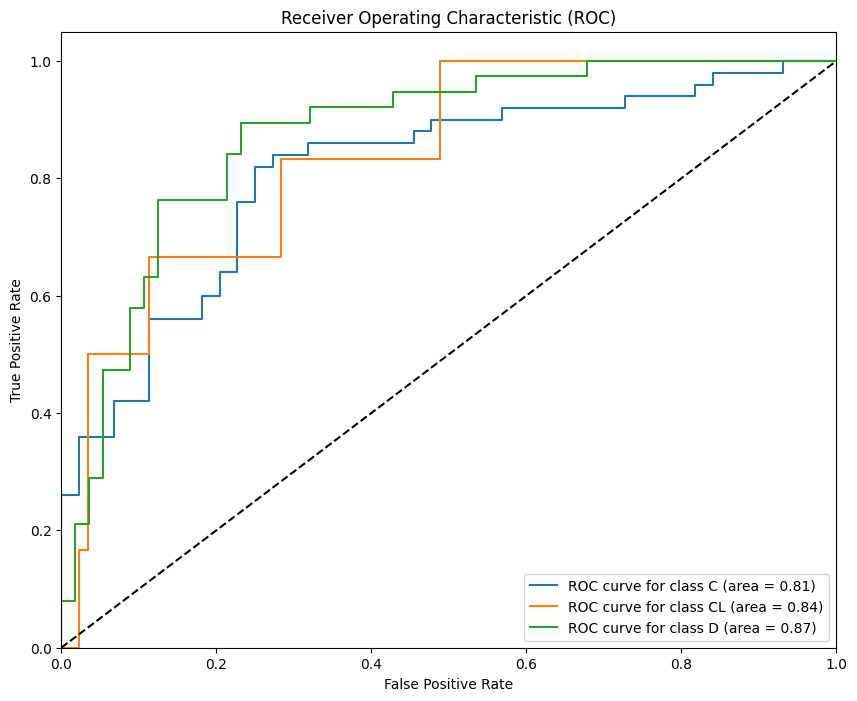

In [28]:
# Построение ROC-кривой для каждого класса
plt.figure(figsize=(10, 8))

for i, class_name in enumerate(classes):
    # Вычисление ROC-кривой
    fpr, tpr, _ = roc_curve(y_test == i, logreg_probs[:, i])
    roc_auc_value = auc(fpr, tpr)
    
    # Построение ROC-кривой
    plt.plot(fpr, tpr, label=f'ROC curve for class {class_name} (area = {roc_auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
import os
import graphviz
import pydotplus

os.environ["PATH"] += os.pathsep + '/usr/local/bin/'

def plot_tree(model, cols, fname='temp_tree.png'):
    dot_data = export_graphviz(model, filled=True, rounded=True, feature_names=cols, out_file=None)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.write_png(fname)
    img = plt.imread(fname)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [55]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=5, criterion='gini')
clf.fit(X_train_scaled, y_train)
dtc_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.40      0.33      0.36         6
           2       0.67      0.74      0.70        38

    accuracy                           0.71        94
   macro avg       0.62      0.60      0.61        94
weighted avg       0.71      0.71      0.71        94



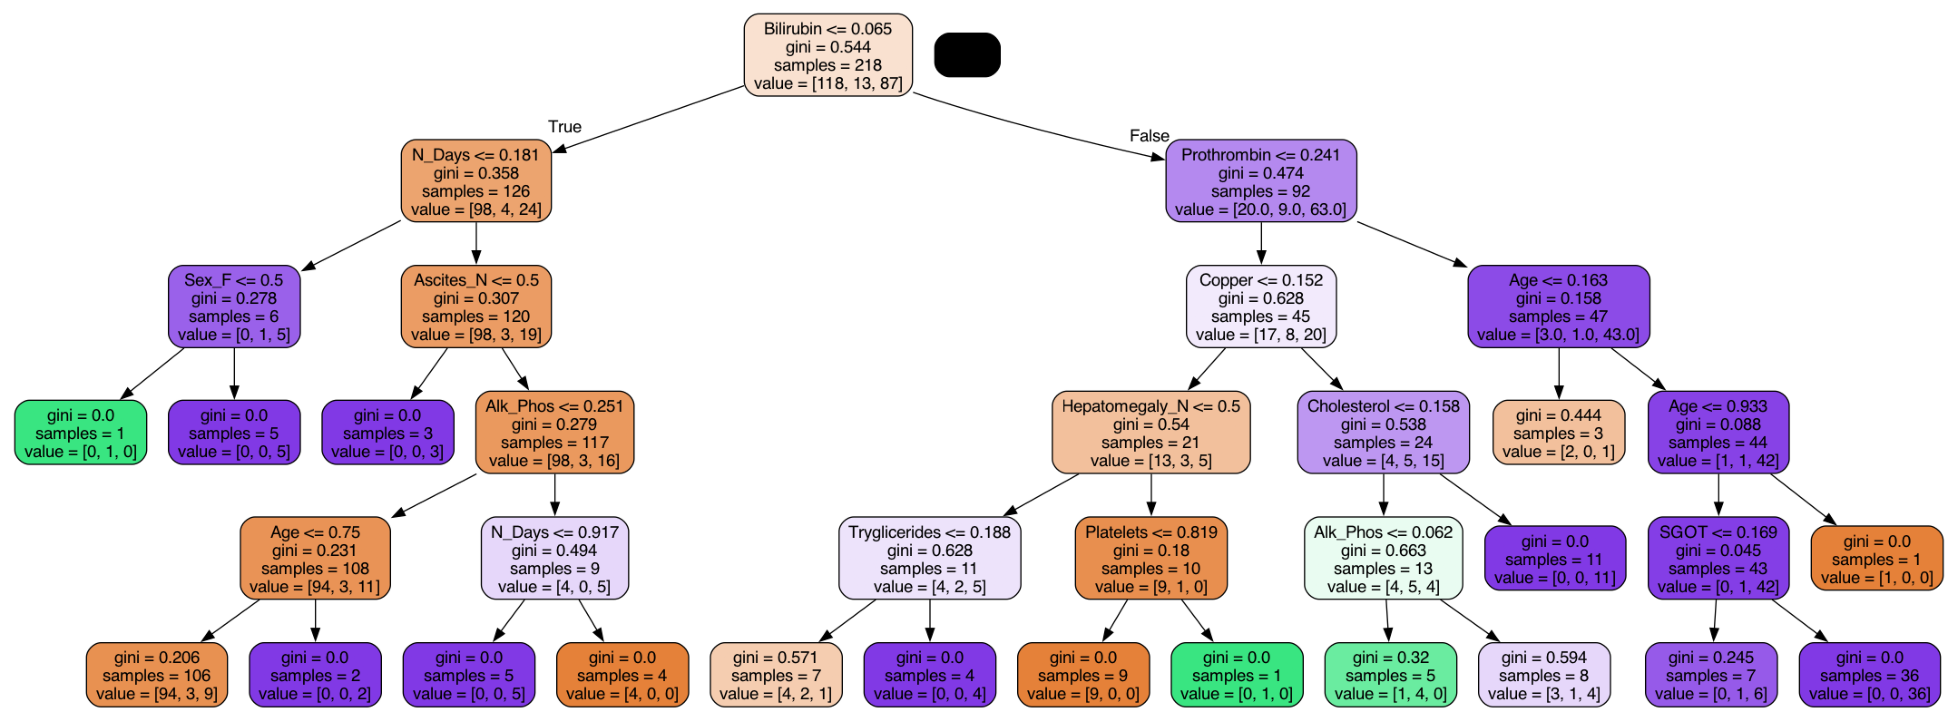

In [56]:
plt.figure(figsize=(25, 25))
plt.axis('off')
plot_tree(clf, X.columns)

In [57]:
clf.feature_importances_

array([0.13151271, 0.08807233, 0.358607  , 0.05154758, 0.        ,
       0.04813668, 0.06578184, 0.00286666, 0.03486323, 0.02157162,
       0.09487871, 0.        , 0.        , 0.01997373, 0.        ,
       0.05073838, 0.        , 0.03144954, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [58]:
pd.DataFrame(clf.feature_importances_, index = list(X),\
             columns = ['feature importance']).sort_values('feature importance', ascending = False)

,feature importance
Bilirubin,0.358607
N_Days,0.131513
Prothrombin,0.094879
Age,0.088072
Alk_Phos,0.065782
Cholesterol,0.051548
Ascites_N,0.050738
Copper,0.048137
Tryglicerides,0.034863
Hepatomegaly_N,0.031450


In [71]:
# Import GridSearchCV class
from sklearn.model_selection import GridSearchCV

# Define Decision Tree classifier with default parameters
clf = DecisionTreeClassifier()

# Estimate grid of the classifier hyperparameters
parameters = {'max_depth':[1, 3, 5, 7, 10, None],
              'min_samples_split' : [2,5,10,20],
              'min_samples_leaf':[1, 5, 10,50]}

# Define GridSearch parameters
gs = GridSearchCV(clf,                 # Classifier object to optimize
                  parameters,          # Grid of the hyperparameters
                  scoring='precision_macro',  # Claasification quality metric to optimize
                  cv=5)                # Number of folds in KFolds cross-validation (CV)


# Run Grid Search optimization
gs.fit(X_train, y_train)
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [72]:
gs_pred = gs.predict(X_test_scaled)
print(classification_report(y_test,gs_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.06      1.00      0.12         6
           2       0.00      0.00      0.00        38

    accuracy                           0.06        94
   macro avg       0.02      0.33      0.04        94
weighted avg       0.00      0.06      0.01        94



In [83]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)
knn_probs = knn.predict_proba(X_test_scaled)

In [68]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73        50
           1       0.00      0.00      0.00         6
           2       0.69      0.53      0.60        38

    accuracy                           0.66        94
   macro avg       0.45      0.46      0.44        94
weighted avg       0.62      0.66      0.63        94



In [69]:
accuracy = accuracy_score(y_test, knn_preds)
precision = precision_score(y_test, knn_preds, average='weighted', zero_division=np.nan)
recall = recall_score(y_test, knn_preds, average='weighted')
f1 = f1_score(y_test, knn_preds, average='weighted')
print("Accuracy:    {:.3f}\nPrecision:    {:.3f}\nRecal:    {:.3f}\nF1-Score:    {:.3f}".format(accuracy, precision, recall, f1))

Accuracy:    0.660
Precision:    0.665
Recal:    0.660
F1-Score:    0.630


In [101]:
y_test.shape, knn_probs.shape

((94,), (94, 3))

In [109]:
# knn_pprobs_encoded = le.fit_transform(knn_probs)
# knn_preds_onehot = enc.fit_transform(knn_probs_encoded.reshape(-1, 1))
# knn_auc = roc_auc_score(y_test, knn_probs, average='weighted', multi_class='ovr')
knn_auc = roc_auc_score(y_test, knn_probs, average='weighted', multi_class='ovr')
print("ROC-AUC:", knn_auc)

ROC-AUC: 0.7321601271069357


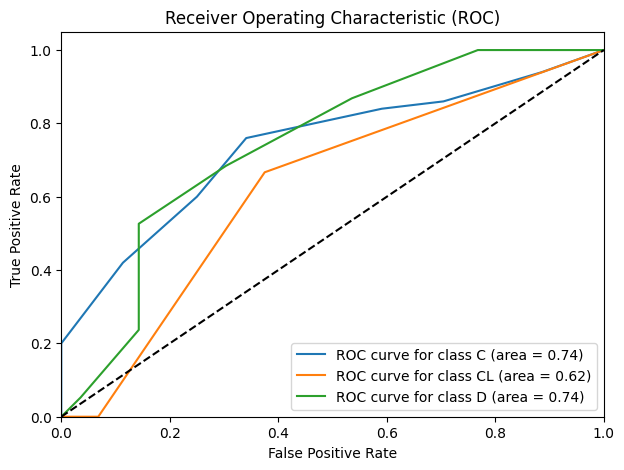

In [117]:
# Построение ROC-кривой для каждого класса
plt.figure(figsize=(7, 5))

for i, class_name in enumerate(classes):
    # Вычисление ROC-кривой
    fpr, tpr, _ = roc_curve(y_test == i, knn_probs[:, i])
    roc_auc_value = auc(fpr, tpr)
    
    # Построение ROC-кривой
    plt.plot(fpr, tpr, label=f'ROC curve for class {class_name} (area = {roc_auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

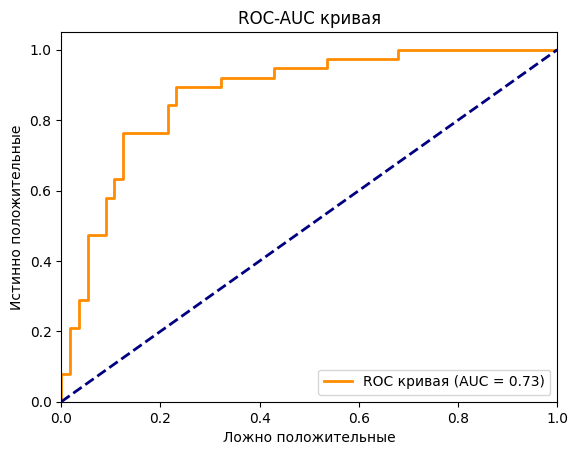

In [110]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC кривая (AUC = %0.2f)' % knn_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
plt.title('ROC-AUC кривая')
plt.legend(loc="lower right")
plt.show()

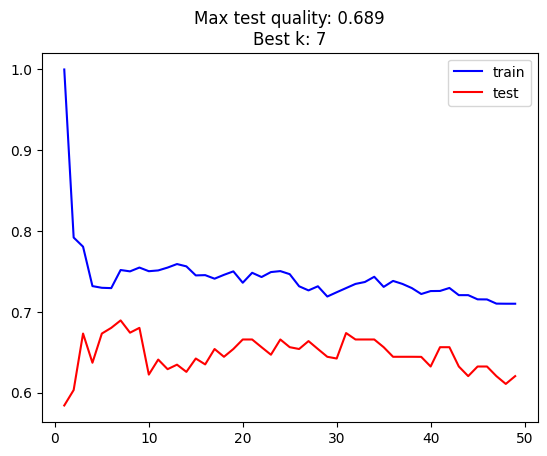

In [66]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train, average='weighted'))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test, average='weighted'))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();